In [1]:
library(qvalue)
library(dplyr)
library(ggplot2)
library(ggthemes)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
Giordanos_selection = "/hps/nobackup/stegle/users/galvari/data/iPSCs/singleCell/metadata/ensembl_gene/Ensembl_75_Gene_CV_quant5.txt"
G_file = read.csv(Giordanos_selection, sep = "\t")
nrow(G_file)
head(G_file,2)

[1] 21592

,gene,mean,std,CV,quartile_cv
2,ENSG00000227232,3.1805905,3.6232403,1.139172,2
3,ENSG00000243485,0.2003178,0.8649483,4.317881,3


In [3]:
bulk_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/Bulk/BulkTotal_PCA20/"

In [4]:
# res_all = read.csv(paste0(bulk_folder,"qtl_results_all.txt"), sep = "\t")
# nrow(res_all)

In [5]:
leads_all = read.csv(paste0(bulk_folder,"top_qtl_results_all.txt"), sep = "\t")
nrow(leads_all)

[1] 49916

In [6]:
df0 = leads_all
df0 <- df0[-which(duplicated(df0$feature_id)),]
length(unique(df0$feature_id))
df1 = df0[df0$feature_id %in% G_file$gene,]
length(unique(df1$feature_id))
df1$q_value = qvalue(df1$empirical_feature_p_value)$qvalues
length(unique(df1[df1$q_value < 0.05,'feature_id']))

[1] 49554

[1] 20541

[1] 13869

In [7]:
df2 = df1[df1$q_value < 0.05,]
nrow(df2)

[1] 13869

In [8]:
##### Mean
mean_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/mean/"
my_folder = paste0(mean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs

In [9]:
res_mean = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")

In [10]:
df3 = inner_join(df2, res_mean, by = c("snp_id","feature_id"), suffix = c(".bulk",".sc"))
df3 <- df3[-which(duplicated(df3$feature_id)),]
nrow(df3)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 13869

In [11]:
df3 = df3[order(df3$q_value),]
df3$nom_sign = df3$p_value.sc < 0.05
df3$same_effect_sign = (df3$beta.sc * df3$beta.bulk) > 0
head(df3,2)

,snp_id,p_value.bulk,beta.bulk,beta_se.bulk,empirical_feature_p_value.bulk,feature_chromosome.bulk,feature_start.bulk,feature_end.bulk,n_samples.bulk,n_e_samples.bulk,...,alpha_param.sc,beta_param.sc,snp_chromosome.sc,snp_position.sc,assessed_allele.sc,call_rate.sc,maf.sc,hwe_p.sc,nom_sign,same_effect_sign
12067,17_43704031_C_A,1.731882e-124,-1.240223,0.05226204,8.299205e-142,17,43578685,43627701,810,526,...,0.8656900,19.26625,17,43704031,A,1,0.2701149,0.1020851,TRUE,TRUE
12065,17_43704031_C_A,1.919183e-123,-1.209482,0.05118531,7.107490e-130,17,43697694,43725582,810,526,...,0.4735916,66.78895,17,43704031,A,1,0.2701149,0.1020851,TRUE,TRUE


In [12]:
TPR = c()
tp = 0
for (i in 1:nrow(df3)){
    if (df3$nom_sign[i] == TRUE & df3$same_effect_sign[i] == TRUE){tp = tp+1}
#     if (df3$nom_sign[i] == TRUE){tp = tp+1}
    TPR[i] = tp/i
}

In [13]:
# nrow(df3)
df_mean = data.frame(ranked_genes = 1:nrow(df3), tpr = TPR, method = "mean",level = "donor_run")
tail(df_mean)

,ranked_genes,tpr,method,level
13864,13864,0.2867859,mean,donor_run
13865,13865,0.2867652,mean,donor_run
13866,13866,0.2867446,mean,donor_run
13867,13867,0.2867239,mean,donor_run
13868,13868,0.2867032,mean,donor_run
13869,13869,0.2866825,mean,donor_run


In [14]:
#######

In [15]:
##### Sum
sum_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/sum/"
my_folder = paste0(sum_folder,"Run_Output_PCA20_88_log_TPM_edgeR_libsize_206/") # edgeR, 20PCs

res_sum = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")

In [16]:
df4 = inner_join(df2, res_sum, by = c("snp_id","feature_id"), suffix = c(".bulk",".sc"))
df4 <- df4[-which(duplicated(df4$feature_id)),]
nrow(df4)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 13638

In [17]:
df4 = df4[order(df4$q_value),]
df4$nom_sign = df4$p_value.sc < 0.05
df4$same_effect_sign = (df4$beta.sc * df4$beta.bulk) > 0
head(df4,2)

,snp_id,p_value.bulk,beta.bulk,beta_se.bulk,empirical_feature_p_value.bulk,feature_chromosome.bulk,feature_start.bulk,feature_end.bulk,n_samples.bulk,n_e_samples.bulk,...,alpha_param.sc,beta_param.sc,snp_chromosome.sc,snp_position.sc,assessed_allele.sc,call_rate.sc,maf.sc,hwe_p.sc,nom_sign,same_effect_sign
11868,17_43704031_C_A,1.731882e-124,-1.240223,0.05226204,8.299205e-142,17,43578685,43627701,810,526,...,0.8237323,11.59423,17,43704031,A,1,0.254902,0.287227,TRUE,TRUE
11866,17_43704031_C_A,1.919183e-123,-1.209482,0.05118531,7.107490e-130,17,43697694,43725582,810,526,...,0.7289394,28.32388,17,43704031,A,1,0.254902,0.287227,TRUE,TRUE


In [18]:
TPR = c()
tp = 0
for (i in 1:nrow(df4)){
    if (df4$nom_sign[i] == TRUE & df4$same_effect_sign[i] == TRUE){tp = tp+1}
#     if (df3$nom_sign[i] == TRUE){tp = tp+1}
    TPR[i] = tp/i
}

In [19]:
# nrow(df4)
df_sum = data.frame(ranked_genes = 1:nrow(df4), tpr = TPR, method = "sum",level = "donor_run")
tail(df_sum)

,ranked_genes,tpr,method,level
13633,13633,0.2778552,sum,donor_run
13634,13634,0.2779082,sum,donor_run
13635,13635,0.2778878,sum,donor_run
13636,13636,0.2778674,sum,donor_run
13637,13637,0.2778470,sum,donor_run
13638,13638,0.2778267,sum,donor_run


In [20]:
#######

In [21]:
##### Total Mean
totmean_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmean/"
my_folder = paste0(totmean_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs

In [22]:
res_totmean = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")

In [23]:
df5 = inner_join(df2, res_totmean, by = c("snp_id","feature_id"), suffix = c(".bulk",".sc"))
df5 <- df5[-which(duplicated(df5$feature_id)),]
nrow(df5)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 13869

In [24]:
df5 = df5[order(df5$q_value),]
df5$nom_sign = df5$p_value.sc < 0.05
df5$same_effect_sign = (df5$beta.sc * df5$beta.bulk) > 0
head(df5,2)

,snp_id,p_value.bulk,beta.bulk,beta_se.bulk,empirical_feature_p_value.bulk,feature_chromosome.bulk,feature_start.bulk,feature_end.bulk,n_samples.bulk,n_e_samples.bulk,...,alpha_param.sc,beta_param.sc,snp_chromosome.sc,snp_position.sc,assessed_allele.sc,call_rate.sc,maf.sc,hwe_p.sc,nom_sign,same_effect_sign
12067,17_43704031_C_A,1.731882e-124,-1.240223,0.05226204,8.299205e-142,17,43578685,43627701,810,526,...,0.8206135,21.45471,17,43704031,A,1,0.2701149,0.1020851,TRUE,TRUE
12065,17_43704031_C_A,1.919183e-123,-1.209482,0.05118531,7.107490e-130,17,43697694,43725582,810,526,...,0.7818494,18.52813,17,43704031,A,1,0.2701149,0.1020851,TRUE,TRUE


In [25]:
TPR = c()
tp = 0
for (i in 1:nrow(df5)){
    if (df5$nom_sign[i] == TRUE & df5$same_effect_sign[i] == TRUE){tp = tp+1}
#     if (df3$nom_sign[i] == TRUE){tp = tp+1}
    TPR[i] = tp/i
}

In [26]:
df_totmean = data.frame(ranked_genes = 1:nrow(df5), tpr = TPR, method = "mean",level = "donor")
tail(df_totmean)

,ranked_genes,tpr,method,level
13864,13864,0.2767600,mean,donor
13865,13865,0.2767400,mean,donor
13866,13866,0.2767200,mean,donor
13867,13867,0.2767001,mean,donor
13868,13868,0.2766801,mean,donor
13869,13869,0.2766602,mean,donor


In [27]:
#######

In [28]:
##### Total Sum
totsum_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totsum/"
my_folder = paste0(totsum_folder,"Run_Output_PCA20_88_log_TPM_edgeR_libsize_206/") # edgeR, 20PCs

res_totsum = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")

In [29]:
res_totsum = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")

In [30]:
df6 = inner_join(df2, res_totsum, by = c("snp_id","feature_id"), suffix = c(".bulk",".sc"))
df6 <- df6[-which(duplicated(df6$feature_id)),]
nrow(df6)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 13869

In [31]:
df6 = df6[order(df6$q_value),]
df6$nom_sign = df6$p_value.sc < 0.05
df6$same_effect_sign = (df6$beta.sc * df6$beta.bulk) > 0
head(df6,2)

,snp_id,p_value.bulk,beta.bulk,beta_se.bulk,empirical_feature_p_value.bulk,feature_chromosome.bulk,feature_start.bulk,feature_end.bulk,n_samples.bulk,n_e_samples.bulk,...,alpha_param.sc,beta_param.sc,snp_chromosome.sc,snp_position.sc,assessed_allele.sc,call_rate.sc,maf.sc,hwe_p.sc,nom_sign,same_effect_sign
12067,17_43704031_C_A,1.731882e-124,-1.240223,0.05226204,8.299205e-142,17,43578685,43627701,810,526,...,0.7312888,14.81573,17,43704031,A,1,0.2701149,0.1020851,TRUE,TRUE
12065,17_43704031_C_A,1.919183e-123,-1.209482,0.05118531,7.107490e-130,17,43697694,43725582,810,526,...,0.7567724,29.08926,17,43704031,A,1,0.2701149,0.1020851,TRUE,TRUE


In [32]:
TPR = c()
tp = 0
for (i in 1:nrow(df6)){
    if (df6$nom_sign[i] == TRUE & df6$same_effect_sign[i] == TRUE){tp = tp+1}
#     if (df3$nom_sign[i] == TRUE){tp = tp+1}
    TPR[i] = tp/i
}

In [33]:
df_totsum = data.frame(ranked_genes = 1:nrow(df6), tpr = TPR, method = "sum",level = "donor")
tail(df_totsum)

,ranked_genes,tpr,method,level
13864,13864,0.2633439,sum,donor
13865,13865,0.2633249,sum,donor
13866,13866,0.2633059,sum,donor
13867,13867,0.2632869,sum,donor
13868,13868,0.2632680,sum,donor
13869,13869,0.2632490,sum,donor


In [34]:
###

In [35]:
df_to_plot = rbind(df_mean, df_sum, df_totmean, df_totsum)
nrow(df_to_plot)

[1] 55245

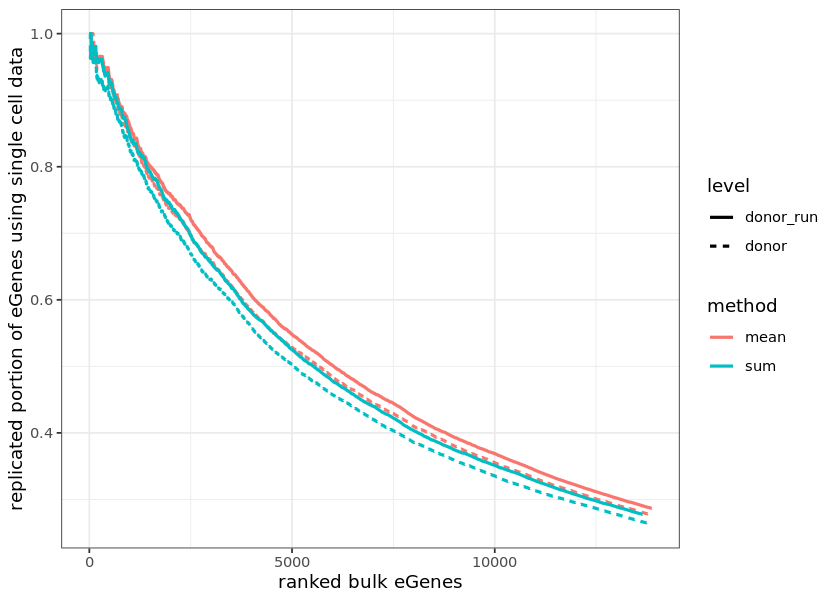

In [36]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df_to_plot, aes(x = ranked_genes, y = tpr, colour = method, linetype = level)) + 
    geom_line(size = 0.9) + 
    theme_bw() + ylab("replicated portion of eGenes using single cell data") + xlab("ranked bulk eGenes")

Warning message:
“Removed 53245 row(s) containing missing values (geom_path).”

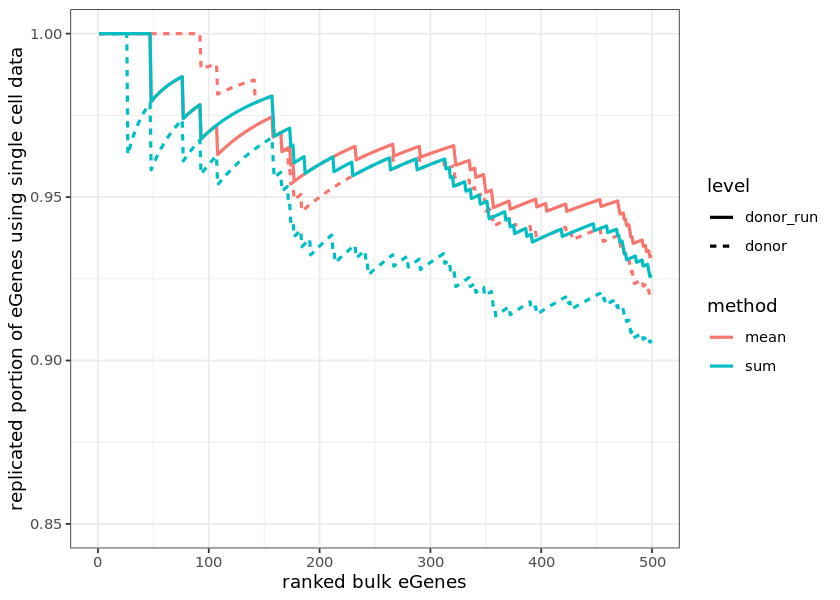

In [37]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df_to_plot, aes(x = ranked_genes, y = tpr, colour = method, linetype = level)) + 
    geom_line(size = 0.9) + xlim(c(0,500)) + ylim(c(0.85,1)) + 
    theme_bw() + ylab("replicated portion of eGenes using single cell data") + xlab("ranked bulk eGenes")

In [38]:
######

In [39]:
##### Median
median_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/median/"
my_folder = paste0(median_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs

In [40]:
res_median = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")
df7 = inner_join(df2, res_median, by = c("snp_id","feature_id"), suffix = c(".bulk",".sc"))
df7 <- df7[-which(duplicated(df7$feature_id)),]
nrow(df7)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 9750

In [41]:
df7 = df7[order(df7$q_value),]
df7$nom_sign = df7$p_value.sc < 0.05
df7$same_effect_sign = (df7$beta.sc * df7$beta.bulk) > 0
head(df7,2)

,snp_id,p_value.bulk,beta.bulk,beta_se.bulk,empirical_feature_p_value.bulk,feature_chromosome.bulk,feature_start.bulk,feature_end.bulk,n_samples.bulk,n_e_samples.bulk,...,alpha_param.sc,beta_param.sc,snp_chromosome.sc,snp_position.sc,assessed_allele.sc,call_rate.sc,maf.sc,hwe_p.sc,nom_sign,same_effect_sign
8502,17_43704031_C_A,1.731882e-124,-1.240223,0.05226204,8.299205e-142,17,43578685,43627701,810,526,...,1.0369389,15.51669,17,43704031,A,1,0.2701149,0.1020851,TRUE,TRUE
8501,17_43704031_C_A,1.919183e-123,-1.209482,0.05118531,7.107490e-130,17,43697694,43725582,810,526,...,0.9586181,14.95122,17,43704031,A,1,0.2701149,0.1020851,TRUE,TRUE


In [42]:
TPR = c()
tp = 0
for (i in 1:nrow(df7)){
    if (df7$nom_sign[i] == TRUE & df7$same_effect_sign[i] == TRUE){tp = tp+1}
#     if (df3$nom_sign[i] == TRUE){tp = tp+1}
    TPR[i] = tp/i
}
df_median = data.frame(ranked_genes = 1:nrow(df7), tpr = TPR, method = "median",level = "donor_run")
tail(df_median)

,ranked_genes,tpr,method,level
9745,9745,0.2432016,median,donor_run
9746,9746,0.2431767,median,donor_run
9747,9747,0.2431517,median,donor_run
9748,9748,0.2431268,median,donor_run
9749,9749,0.2431019,median,donor_run
9750,9750,0.2430769,median,donor_run


In [43]:
##### Total Median
totmedian_folder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/totmedian/"
my_folder = paste0(totmedian_folder,"Run_Output_PCA20_88_log_TPM_scater_libsize_206/") # scran, 20PCs

In [44]:
res_totmedian = read.csv(paste0(my_folder,"qtl_results_all.txt"), sep = "\t")
df8 = inner_join(df2, res_totmedian, by = c("snp_id","feature_id"), suffix = c(".bulk",".sc"))
df8 <- df8[-which(duplicated(df8$feature_id)),]
nrow(df8)

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”

[1] 9136

In [45]:
df8 = df8[order(df8$q_value),]
df8$nom_sign = df8$p_value.sc < 0.05
df8$same_effect_sign = (df8$beta.sc * df8$beta.bulk) > 0
head(df8,2)

,snp_id,p_value.bulk,beta.bulk,beta_se.bulk,empirical_feature_p_value.bulk,feature_chromosome.bulk,feature_start.bulk,feature_end.bulk,n_samples.bulk,n_e_samples.bulk,...,alpha_param.sc,beta_param.sc,snp_chromosome.sc,snp_position.sc,assessed_allele.sc,call_rate.sc,maf.sc,hwe_p.sc,nom_sign,same_effect_sign
7960,17_43704031_C_A,1.731882e-124,-1.240223,0.05226204,8.299205e-142,17,43578685,43627701,810,526,...,0.6825864,25.86223,17,43704031,A,1,0.2784091,0.1873147,TRUE,TRUE
7959,17_43704031_C_A,1.919183e-123,-1.209482,0.05118531,7.107490e-130,17,43697694,43725582,810,526,...,0.7812425,22.62187,17,43704031,A,1,0.2784091,0.1873147,TRUE,TRUE


In [46]:
TPR = c()
tp = 0
for (i in 1:nrow(df8)){
    if (df8$nom_sign[i] == TRUE & df8$same_effect_sign[i] == TRUE){tp = tp+1}
#     if (df3$nom_sign[i] == TRUE){tp = tp+1}
    TPR[i] = tp/i
}
df_totmedian = data.frame(ranked_genes = 1:nrow(df8), tpr = TPR, method = "median",level = "donor")
tail(df_totmedian)

,ranked_genes,tpr,method,level
9131,9131,0.2480561,median,donor
9132,9132,0.2480289,median,donor
9133,9133,0.2480018,median,donor
9134,9134,0.2479746,median,donor
9135,9135,0.2479475,median,donor
9136,9136,0.2479203,median,donor


In [47]:
df_to_plot2 = rbind(df_mean, df_median, df_sum, df_totmean, df_totmedian, df_totsum)
nrow(df_to_plot2)

[1] 74131

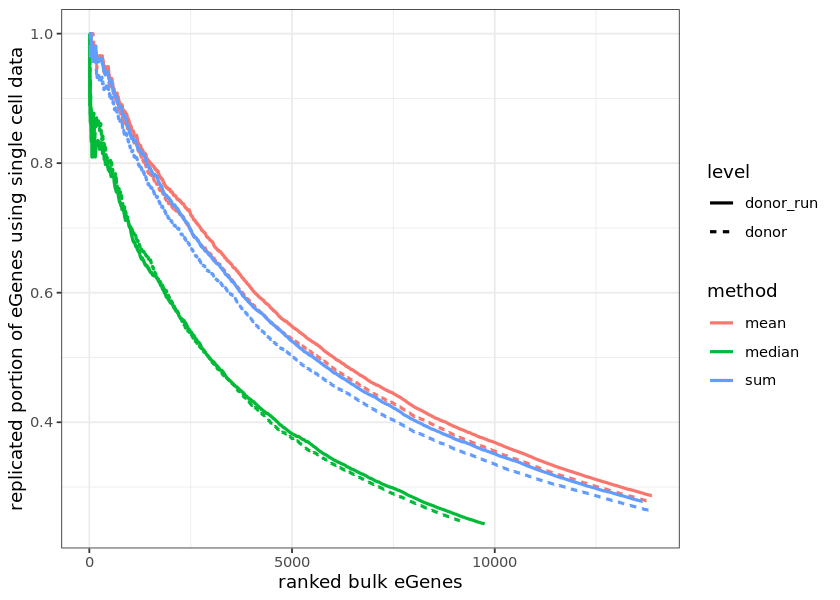

In [48]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df_to_plot2, aes(x = ranked_genes, y = tpr, colour = method, linetype = level)) + 
    geom_line(size = 0.9) + 
    theme_bw() + ylab("replicated portion of eGenes using single cell data") + xlab("ranked bulk eGenes")

Warning message:
“Removed 71715 row(s) containing missing values (geom_path).”

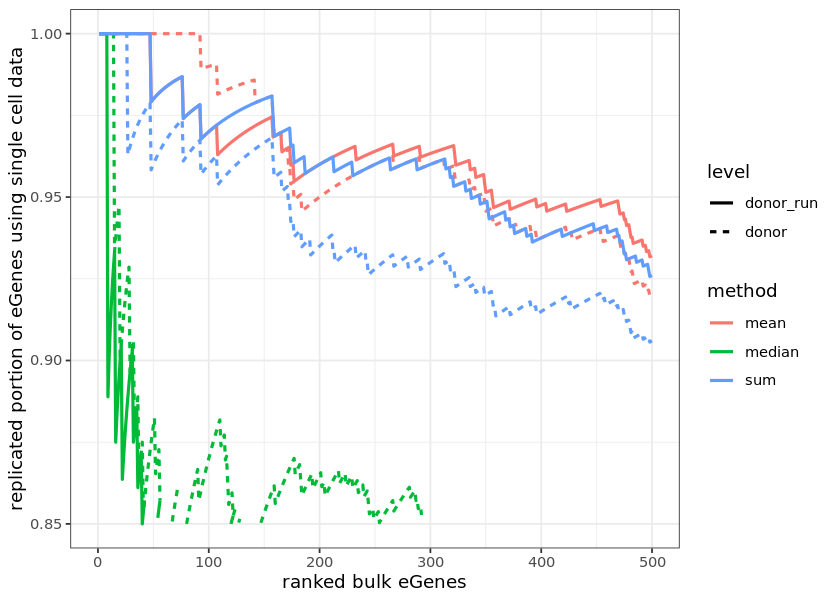

In [49]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df_to_plot2, aes(x = ranked_genes, y = tpr, colour = method, linetype = level)) + 
    geom_line(size = 0.9) + xlim(c(0,500)) + ylim(c(0.85,1)) + 
    theme_bw() + ylab("replicated portion of eGenes using single cell data") + xlab("ranked bulk eGenes")

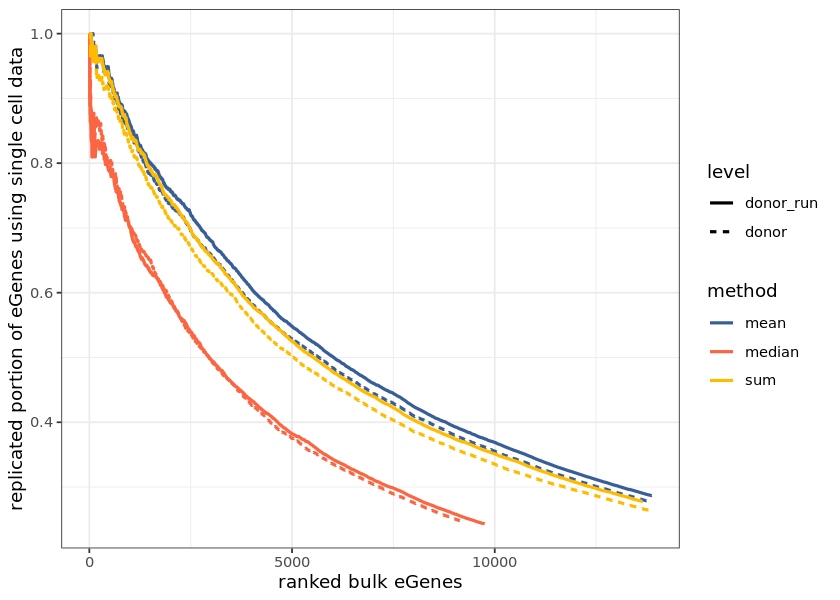

In [50]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df_to_plot2, aes(x = ranked_genes, y = tpr, colour = method, linetype = level)) + 
    geom_line(size = 0.9) + scale_color_canva(palette = "Primary colors with a vibrant twist") +
    theme_bw() + ylab("replicated portion of eGenes using single cell data") + xlab("ranked bulk eGenes")

In [51]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/figures/"

In [52]:
pdf(paste0(fig_dir,"ROC_bulk_eqtls.pdf"), width=7, height=5)
ggplot(df_to_plot2, aes(x = ranked_genes, y = tpr, colour = method, linetype = level)) + 
    geom_line(size = 0.9) + scale_color_canva(palette = "Primary colors with a vibrant twist") +
    theme_bw() + ylab("replicated portion of eGenes using single cell data") + xlab("ranked bulk eGenes")
dev.off()

png 
  2

Warning message:
“Removed 69886 row(s) containing missing values (geom_path).”

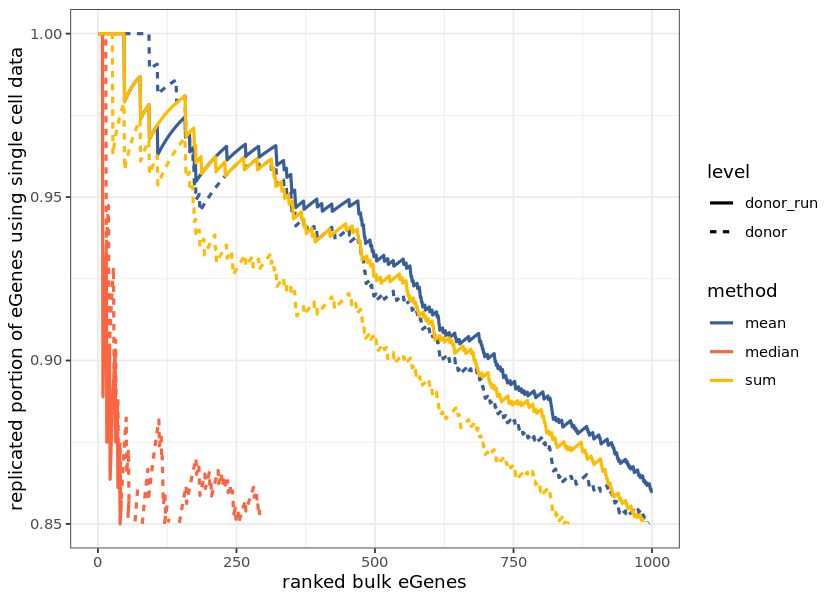

In [53]:
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df_to_plot2, aes(x = ranked_genes, y = tpr, colour = method, linetype = level)) + 
    geom_line(size = 0.9) + xlim(c(0,1000)) + ylim(c(0.85,1)) + 
    scale_color_canva(palette = "Primary colors with a vibrant twist") +
    theme_bw() + ylab("replicated portion of eGenes using single cell data") + xlab("ranked bulk eGenes")

In [54]:
pdf(paste0(fig_dir,"ROC_bulk_eqtls_inlet_0_1000.pdf"), width=7, height=5)
ggplot(df_to_plot2, aes(x = ranked_genes, y = tpr, colour = method, linetype = level)) + 
    geom_line(size = 0.9) + xlim(c(0,1000)) + ylim(c(0.85,1)) + 
    scale_color_canva(palette = "Primary colors with a vibrant twist") +
    theme_bw() + ylab("replicated portion of eGenes using single cell data") + xlab("ranked bulk eGenes")
dev.off()

Warning message:
“Removed 69886 row(s) containing missing values (geom_path).”

png 
  2

In [2]:
library(ggthemes)

mypalette = "Primary colors with a vibrant twist"
canva_pal(mypalette)(4)[1]
canva_pal(mypalette)(4)[2]
canva_pal(mypalette)(4)[3]

[1] "#375e97"

[1] "#fb6542"

[1] "#ffbb00"